<a href="https://colab.research.google.com/github/sushant1911/Machine-Learning/blob/master/lineartensorsklearnecomerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

In [0]:
import pandas as pd
df=pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [41]:
df['domain'] = df['Email'].str.split('@').str[1]

0            fernandez.com
1              hotmail.com
2                yahoo.com
3                gmail.com
4      davidson-herman.com
              ...         
495        craig-evans.com
496              gmail.com
497            hotmail.com
498            hotmail.com
499           davidson.com
Name: Email, Length: 500, dtype: object

In [37]:
df['domain'].value_counts().head()

hotmail.com    87
gmail.com      87
yahoo.com      76
jones.com       2
barber.com      2
Name: domain, dtype: int64

In [38]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,domain
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com


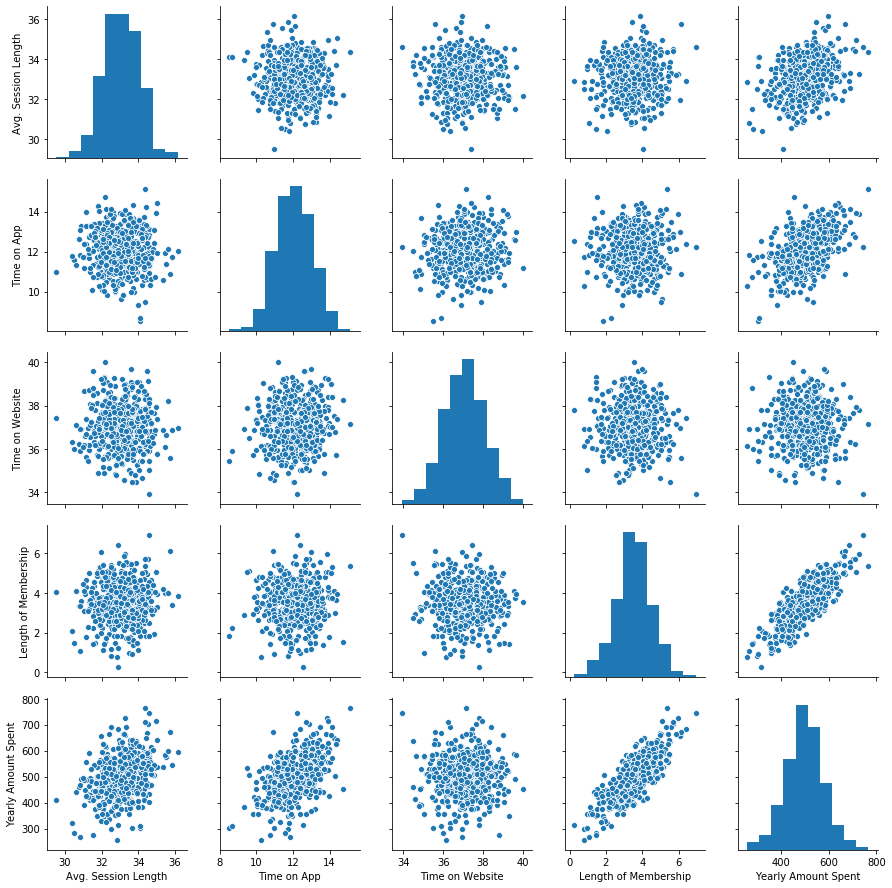

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [0]:
traindata=df.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(traindata,df['Yearly Amount Spent'],test_size=.3,random_state=101)

In [19]:
trainy.shape

(350,)

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [20]:
lr.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lr.score(trainx,trainy)

0.9817562058732432

In [0]:
prediction=lr.predict(testx)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(testy,prediction))

7.2281486534308295


In [27]:
mean_squared_error(testy,prediction)

79.8130516509743

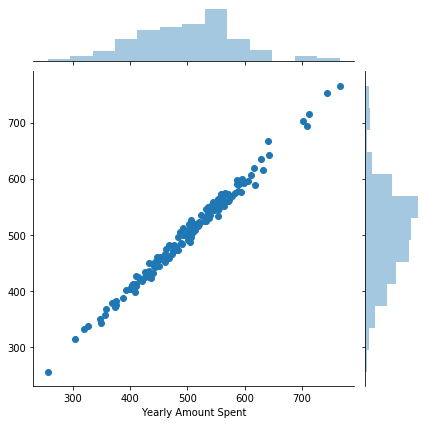

In [28]:
sb.jointplot(testy,prediction)

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [31]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
model=keras.Sequential([
        keras.layers.Dense(64,activation='relu',input_shape=[len(trainx.keys())]),
        keras.layers.Dense(32,activation='relu'),
       keras.layers.Dense(1,activation='relu')
])


In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(0.001),loss='mse',metrics=['mae','mse'])

In [41]:
history=model.fit(trainx,trainy,epochs=1000,verbose=0.2, callbacks=[tfdocs.modeling.EpochDots()])

Train on 350 samples
Epoch 1/1000

Epoch: 0, loss:234733.8641,  mean_absolute_error:478.3511,  mean_squared_error:234733.8750,  
.Epoch 2/1000
.Epoch 3/1000
.Epoch 4/1000
.Epoch 5/1000
.Epoch 6/1000
.Epoch 7/1000
.Epoch 8/1000
.Epoch 9/1000
.Epoch 10/1000
.Epoch 11/1000
.Epoch 12/1000
.Epoch 13/1000
.Epoch 14/1000
.Epoch 15/1000
.Epoch 16/1000
.Epoch 17/1000
.Epoch 18/1000
.Epoch 19/1000
.Epoch 20/1000
.Epoch 21/1000
.Epoch 22/1000
.Epoch 23/1000
.Epoch 24/1000
.Epoch 25/1000
.Epoch 26/1000
.Epoch 27/1000
.Epoch 28/1000
.Epoch 29/1000
.Epoch 30/1000
.Epoch 31/1000
.Epoch 32/1000
.Epoch 33/1000
.Epoch 34/1000
.Epoch 35/1000
.Epoch 36/1000
.Epoch 37/1000
.Epoch 38/1000
.Epoch 39/1000
.Epoch 40/1000
.Epoch 41/1000
.Epoch 42/1000
.Epoch 43/1000
.Epoch 44/1000
.Epoch 45/1000
.Epoch 46/1000
.Epoch 47/1000
.Epoch 48/1000
.Epoch 49/1000
.Epoch 50/1000
.Epoch 51/1000
.Epoch 52/1000
.Epoch 53/1000
.Epoch 54/1000
.Epoch 55/1000
.Epoch 56/1000
.Epoch 57/1000
.Epoch 58/1000
.Epoch 59/1000
.Epoch 60

In [0]:
pred=model.predict(testx).flatten()

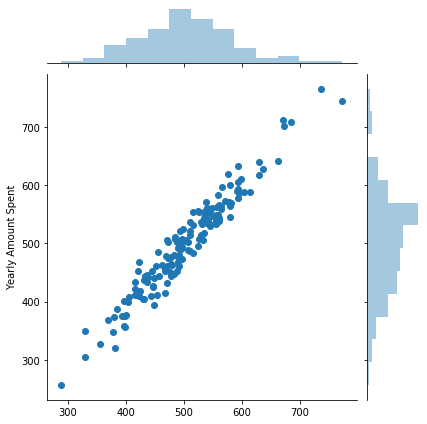

In [44]:
sb.jointplot(pred,testy)